## 시퀀셜 API
여러 층을 일렬로 나열해 만들어진 모델
- 하나의 입력 텐서와 하나의 출력 텐서를 가짐
<hr>

<b> 데이터 셋: Fashion MNIST </b>
- 28 * 28 grey scale 데이터 70,000개
- 패션 아이템을 나타내는 이미지
- 손글씨 숫자 데이터인 MNIST 데이터보다 클래스 별 샘플이 다양하고 어려운 문제
<br>

<b> 데이터 셋 분리 </b>
- 검증 세트: 마지막 5000개 데이터

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()      # tf.keras를 통해 케라스API 사용할 수 있다.
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]   # 검증 데이터 세트

print(X_train.shape, y_train.shape)
print(X_train.dtype)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(55000, 28, 28) (55000,)
uint8


In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [ ]:
# 시퀀셜 API로 모델 만들기

# tf.random.set_seed(42)                                        # 랜덤 시드 설정
# model = tf.keras.Sequential()                                 # 시퀀셜 API: 순서대로 연결된 층을 일렬로 쌓아서 구성
# model.add(tf.keras.layers.Input(shape=[28, 28]))              # 입력 층(데이터 크기를 명시해야 가중치 행렬의 크기를 정할 수 있음)
# model.add(tf.keras.layers.Flatten())                          # 입력 이미지를 1차원으로(평평하게) 변환
# model.add(tf.keras.layers.Dense(300, activation='relu'))      # Dense 은닉 층, 뉴런 300개, 활성화함수 ReLU
# model.add(tf.keras.layers.Dense(100, activation='relu'))      # Dense 은닉 층, 뉴런 100개, 활성화함수 ReLU
# model.add(tf.keras.layers.Dense(10, activation='softmax'))    # Dense 출력 층, 뉴런 10개,분류 문제이므로 소프트맥스 활성화 함수 사용


# 위에서 만든 모델은 아래처럼 구현할 수 있다!
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

*Dense layer = Fully Connected Layer*
### Dense 층 Default 값
- 가중치: 랜덤(대칭성을 깨뜨리기 위해)
- 편향: 0
- **kernel_initializer(가중치)** 혹은 **bias_initializer(편향)** 변수를 통해 초기화 설정 가능
<br>

(+)
- name 매개변수를 통해 각 층의 이름을 명시할 수 있음.
- 케라스는 기본적으로 snake_case로 모델 이름을 생성

In [ ]:
model.layers
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense_7') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

(300,)

In [ ]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",    # 손실함수: 크로스엔트로피
              optimizer="sgd",                          # 최적화 방법: 확률적경사하강법, 기본 학습률 0.01
              metrics=["accuracy"])                     # 평가지표: 정확도

### 손실 함수
- **sparse_categorical_crossentropy:** 다중 클래스 분류에서 라벨을 **Integer 형태**로 반환
- **categorial_crossentropy:** 다중 클래스 분류에서 라벨을 **원핫벡터**로 반환
- **binary_crossentropy:** (다중 레이블) 이진 분류 + 출력층 활성화함수 sigmoid

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6910 - loss: 0.9890 - val_accuracy: 0.8270 - val_loss: 0.4976
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8253 - loss: 0.5056 - val_accuracy: 0.8374 - val_loss: 0.4467
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8428 - loss: 0.4530 - val_accuracy: 0.8462 - val_loss: 0.4244
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8521 - loss: 0.4237 - val_accuracy: 0.8502 - val_loss: 0.4109
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8603 - loss: 0.4025 - val_accuracy: 0.8580 - val_loss: 0.4009
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8656 - loss: 0.3857 - val_accuracy: 0.8606 - val_loss: 0.3930
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8699 - loss: 0.3716 - val_accuracy: 0.8620 - val_loss: 0.3860
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8737 - loss: 0.3593 - 

- accuracy > val_accuracy => 훈련세트 과대적합
- 1719 => 처리한 미니배치 개수 (미니배치 크기 기본 32)
- 검증 정확도 88.23%
<br>

**매개변수 `class_weight`**
: 훈련세트가 편중된 경우, 클래스에 가중치를 부여하기 위해 사용<br>
**매개변수 `sample_weight`**
: 샘플 별로 가중치 부여

- 둘 다 사용된 경우, 케라스 내부적으로 두 값을 곱하여 사용함.
[1, 3] => ((0 * 1) + (1 * 3))/4=0.75

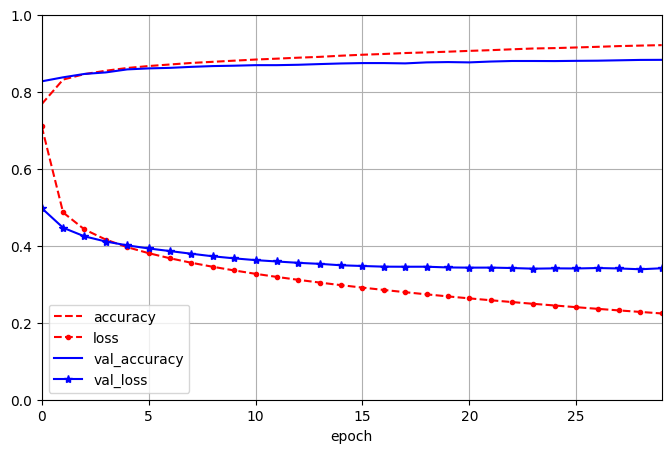

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='epoch', style=["r--", "r--.", "b-", "b-*"]
)
plt.show() # 학습 곡선 그래프

- 검증 정확도가 훈련 정확도보다 높고, 검증 손실이 훈련 손실보다 낮음 = **약간의 과대적합이 있음.**
- 검증 손실은 에폭이 끝난 후에 계산되고, 훈련 손실은 에폭이 진행되는 동안 계산 = 훈련 곡선은 에폭의 절반만큼 왼쪽으로 이동해야 정확한 그래프가 됨.
**=> 훈련 곡선과 검증 곡선이 거의 완벽하게 일치할 것**
- 검증 손실이 수렴되는 모습 => 훈련을 종료해도 됨
- 일반적으로 오래 학습시키면 학습 세트가 검증 세트보다 성능이 좋아지는 경향이 있음.

- 하이퍼파라미터 튜닝: 층 개수, 뉴런 개수, 은닉층 활성화 함수, 배치(매개변수 `batch_size`)

In [ ]:
# 일반화 오류 측정
model.evaluate(X_test, y_test)  # 검증 세트보다 조금 낮은 정확도 87.20%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8720 - loss: 0.3615


[0.35830238461494446, 0.8744000196456909]

In [ ]:
# 모델로 예측 만들기
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.01, 0.  , 0.66],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred
np.array(class_names)[y_pred]
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)